In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from names import names
from scipy.stats import mannwhitneyu
import seaborn as sns
pd.set_option("display.max_columns", 300) #make every column visible
#TSNE
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE





# 2.1 Exploration

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

#class variable is 1,2 turn it into 0,1
df_train.Class=[1 if each ==2 else 0 for each in df_train.Class]
df_test.Class=[1 if each ==2 else 0 for each in df_test.Class]



In [ ]:
df_train


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,Class
3,3.932,3.2512,0,0.0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0.0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,1
5,4.236,3.3944,0,0.0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0.0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,1
6,4.236,3.4286,0,0.0,0,0,0,28.6,2,4,0,-0.275,3.313,2.522,9.383,1,1.014,1.149,0,0,0,1.119,0,0,0,0,1.980,-0.008,0.0,10.276,4.746,0,0,0,0,3.351,2.556,0,7.904,0,0,1
7,5.000,5.0476,1,0.0,0,0,0,11.1,0,3,0,0.000,2.872,0.722,9.657,0,1.092,1.153,0,0,0,1.125,0,0,0,0,2.000,0.446,0.0,18.375,0.800,0,0,0,1,4.712,4.583,0,9.303,0,0,1
8,4.525,3.8301,0,0.0,0,0,0,31.6,3,2,0,-0.039,3.418,2.468,9.786,5,0.980,1.142,0,0,0,1.179,0,0,0,0,2.119,-0.002,0.0,11.115,3.889,0,0,0,0,3.379,2.143,0,7.950,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,5.029,2.5966,0,0.0,0,0,4,46.7,0,4,0,-0.761,3.837,1.418,10.634,10,1.020,1.111,0,0,0,1.254,3,0,0,0,2.403,0.000,0.0,22.765,2.586,0,0,0,0,3.919,2.611,0,8.958,2,0,0
1052,5.287,3.3732,0,0.0,9,0,0,35.3,0,9,9,-5.256,4.319,2.346,11.029,21,1.043,1.140,0,0,0,1.178,1,0,0,0,2.462,0.000,0.0,71.167,3.396,0,0,3,0,3.787,3.083,3,9.278,0,0,0
1053,4.869,1.7670,0,1.0,9,0,5,44.4,0,4,14,-0.391,4.435,1.073,11.072,9,1.016,1.123,0,1,0,1.261,3,0,0,0,2.314,0.000,0.0,33.540,6.465,0,4,13,0,3.848,2.576,5,9.537,1,0,0
1054,5.158,1.6914,2,0.0,36,0,9,56.1,0,0,44,0.000,4.902,0.257,11.817,0,1.007,1.093,0,0,0,1.410,147,0,1,2,2.622,0.000,0.0,0.000,1.535,0,1,16,0,5.808,2.055,8,11.055,0,1,0


In [ ]:
df_train.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,Class
3,3.932,3.2512,0,0.0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0.0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0,1
5,4.236,3.3944,0,0.0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0.0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0,1
6,4.236,3.4286,0,0.0,0,0,0,28.6,2,4,0,-0.275,3.313,2.522,9.383,1,1.014,1.149,0,0,0,1.119,0,0,0,0,1.980,-0.008,0.0,10.276,4.746,0,0,0,0,3.351,2.556,0,7.904,0,0,1
7,5.000,5.0476,1,0.0,0,0,0,11.1,0,3,0,0.000,2.872,0.722,9.657,0,1.092,1.153,0,0,0,1.125,0,0,0,0,2.000,0.446,0.0,18.375,0.800,0,0,0,1,4.712,4.583,0,9.303,0,0,1
8,4.525,3.8301,0,0.0,0,0,0,31.6,3,2,0,-0.039,3.418,2.468,9.786,5,0.980,1.142,0,0,0,1.179,0,0,0,0,2.119,-0.002,0.0,11.115,3.889,0,0,0,0,3.379,2.143,0,7.950,0,0,1


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 846 entries, 3 to 1055
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      846 non-null    float64
 1   V2      846 non-null    float64
 2   V3      846 non-null    int64  
 3   V4      821 non-null    float64
 4   V5      846 non-null    int64  
 5   V6      846 non-null    int64  
 6   V7      846 non-null    int64  
 7   V8      846 non-null    float64
 8   V9      846 non-null    int64  
 9   V10     846 non-null    int64  
 10  V11     846 non-null    int64  
 11  V12     846 non-null    float64
 12  V13     846 non-null    float64
 13  V14     846 non-null    float64
 14  V15     846 non-null    float64
 15  V16     846 non-null    int64  
 16  V17     846 non-null    float64
 17  V18     846 non-null    float64
 18  V19     846 non-null    int64  
 19  V20     846 non-null    int64  
 20  V21     846 non-null    int64  
 21  V22     830 non-null    float64
 22  V

In [ ]:
df_train.describe()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,Class
count,846.000000,846.000000,846.000000,821.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,830.000000,846.000000,846.000000,846.000000,846.000000,838.000000,846.000000,838.00000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,821.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,4.790476,3.054551,0.739953,0.030451,0.946809,0.277778,1.669031,37.422813,1.342790,1.784870,1.426714,-0.195226,3.484957,1.338078,9.948541,3.657210,1.012656,1.129596,0.004728,0.072104,0.024823,1.243898,1.476359,0.037825,0.156028,0.024823,2.218153,-0.001156,0.02506,8.707752,2.634258,0.138298,0.903073,1.241135,0.926714,3.922100,2.549406,0.671395,8.643191,0.059102,0.706856,0.333333
std,0.531991,0.813983,1.504545,0.198281,2.318081,1.045544,2.220221,9.030008,2.018433,1.773856,3.172544,0.758551,0.576065,0.776629,0.906239,4.584588,0.044830,0.028679,0.068639,0.301086,0.189920,0.094109,5.293630,0.190886,0.363097,0.163101,0.221545,0.151233,0.15640,11.842639,2.065726,0.671322,1.526124,2.248684,1.239133,0.992636,0.625021,1.093633,1.223700,0.342364,2.145396,0.471683
min,2.000000,0.803900,0.000000,0.000000,0.000000,0.000000,0.000000,9.100000,0.000000,0.000000,0.000000,-5.256000,1.549000,0.000000,4.174000,0.000000,0.957000,1.022000,0.000000,0.000000,0.000000,0.898000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.099000,0.00000,0.000000,0.579000,0.000000,0.000000,0.000000,0.000000,2.279000,1.467000,0.000000,4.948000,0.000000,0.000000,0.000000
25%,4.499000,2.510175,0.000000,0.000000,0.000000,0.000000,0.000000,30.800000,0.000000,0.000000,0.000000,-0.193000,3.125250,0.866000,9.540000,0.000000,0.983000,1.114250,0.000000,0.000000,0.000000,1.187500,0.000000,0.000000,0.000000,0.000000,2.107000,-0.007000,0.00000,0.000000,1.444750,0.000000,0.000000,0.000000,0.000000,3.497000,2.101000,0.000000,8.009500,0.000000,0.000000,0.000000
50%,4.840000,3.052400,0.000000,0.000000,0.000000,0.000000,1.000000,37.850000,1.000000,1.500000,0.000000,0.000000,3.448000,1.185000,10.057000,2.000000,1.003000,1.129000,0.000000,0.000000,0.000000,1.248500,1.000000,0.000000,0.000000,0.000000,2.251000,0.000000,0.00000,0.000000,2.036000,0.000000,0.000000,0.000000,1.000000,3.732500,2.461000,0.000000,8.508000,0.000000,0.000000,0.000000
75%,5.119000,3.415725,1.000000,0.000000,1.000000,0.000000,3.000000,43.800000,2.000000,3.000000,2.000000,0.000000,3.809000,1.691250,10.509750,6.000000,1.029000,1.142000,0.000000,0.000000,0.000000,1.298750,2.000000,0.000000,0.000000,0.000000,2.359750,0.005000,0.00000,12.952750,3.130000,0.000000,1.000000,2.000000,1.000000,3.980000,2.861000,1.000000,9.019750,0.000000,0.000000,1.000000
max,6.496000,7.918400,12.000000,2.000000,36.000000,13.000000,18.000000,60.700000,24.000000,12.000000,44.000000,4.722000,5.701000,4.491000,12.609000,40.000000,1.303000,1.365000,1.000000,3.000000,2.000000,1.641000,147.000000,1.000000,1.000000,2.000000,2.859000,0.917000,1.00000,71.167000,17.537000,8.000000,12.000000,18.000000,7.000000,10.695000,5.750000,8.000000,14.700000,4.000000,27.000000,1.000000


In [ ]:
# Get the value counts for the target variable
target_counts = df_train['Class'].value_counts()

# Calculate the percentage of observations for each class
target_percentages = target_counts / df_train.shape[0]

print(target_percentages)

0    0.666667
1    0.333333
Name: Class, dtype: float64


In [ ]:
# Check for missing values
missing_values = df_train.isnull().sum()

# Print the count of missing values for each column
print(missing_values)

# get me the procentegaes of missing values
missing_values_percentages = missing_values / df_train.shape[0]

#convert to readable format
missing_values_percentages = missing_values_percentages.apply(lambda x: '{:.2%}'.format(x))


# Print the percentage of missing values for each column
print(missing_values_percentages)


#what are the procentages of rows with missing values
missing_rows = df_train.isnull().any(axis=1).sum() / df_train.shape[0]


# Print the percentage of rows with missing values
print(missing_rows)

#we canot drop the rows with missing values because we will lose 10% of the data

#show the columns with missing values
missing_columns = df_train.columns[df_train.isnull().any()].tolist()

# Print the columns with missing values
print(missing_columns)
#get the index of the columns with missing values




V1        0
V2        0
V3        0
V4       25
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22      16
V23       0
V24       0
V25       0
V26       0
V27       8
V28       0
V29       8
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37      25
V38       0
V39       0
V40       0
V41       0
Class     0
dtype: int64
V1       0.00%
V2       0.00%
V3       0.00%
V4       2.96%
V5       0.00%
V6       0.00%
V7       0.00%
V8       0.00%
V9       0.00%
V10      0.00%
V11      0.00%
V12      0.00%
V13      0.00%
V14      0.00%
V15      0.00%
V16      0.00%
V17      0.00%
V18      0.00%
V19      0.00%
V20      0.00%
V21      0.00%
V22      1.89%
V23      0.00%
V24      0.00%
V25      0.00%
V26      0.00%
V27      0.95%
V28      0.00%
V29      0.95%
V30      0.00%
V31      0.00%
V32      0.00%
V33

In [ ]:
# Print the index of the columns with missing values
for i in missing_columns:
    print(names[df_train.columns.get_loc(i)])

F01[N-N]: Frequency of N-N at topological distance 1
SpPosA_B(p): Normalized spectral positive sum from Burden matrix weighted by polarizability
SpMax_A: Leading eigenvalue from adjacency matrix (Lovasz-Pelikan index)
B04[C-Br]: Presence/absence of C - Br at topological distance 4
Psi_i_A: Intrinsic state pseudoconnectivity index - type S average


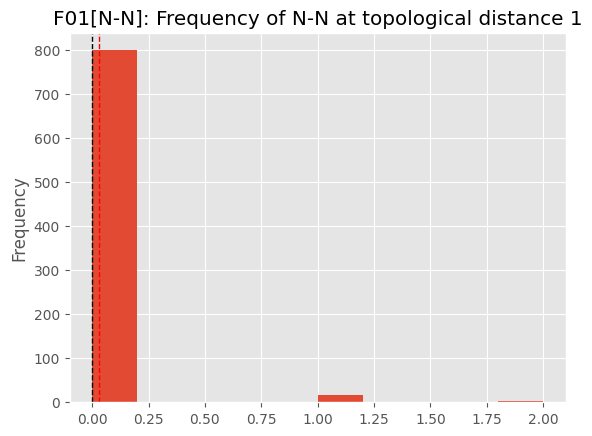

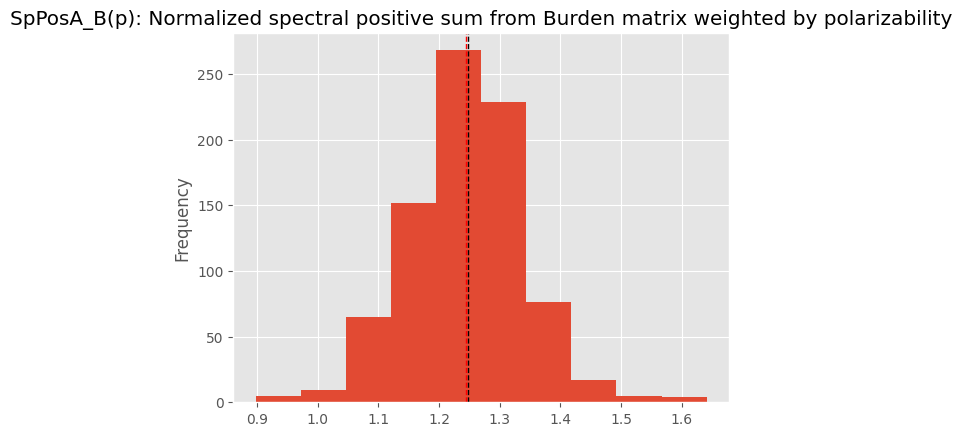

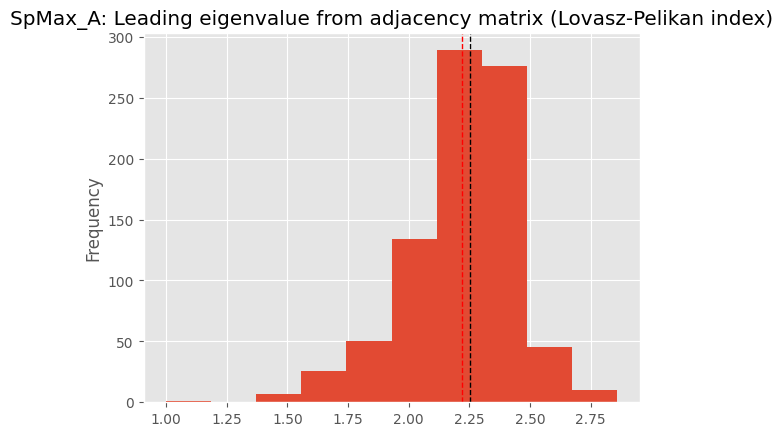

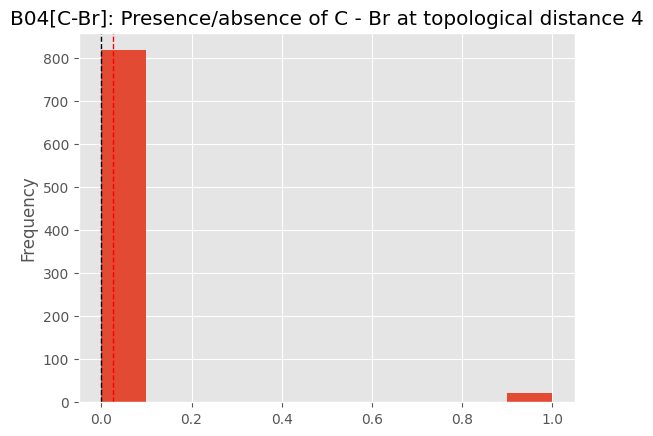

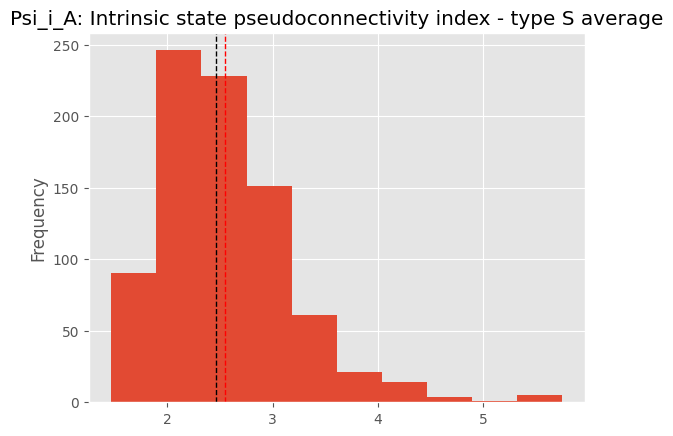

In [ ]:

for i in missing_columns:
    
    # Plot the distribution of the column
    median =  df_train[i].median()
    avg =  df_train[i].mean()
    df_train[i].plot(kind='hist', title=names[df_train.columns.get_loc(i)])
    plt.axvline(median, color='k', linestyle='dashed', linewidth=1)
    plt.axvline(avg, color='r', linestyle='dashed', linewidth=1)

    # Show the plot
    plt.show()

In [ ]:
#fill the missing values with proper values
missing =['V4', 'V22', 'V27', 'V29', 'V37']
# column V4 SET TO 0
df_train['V4'].fillna(0, inplace=True)

# column V22 SET TO mean
df_train['V22'].fillna(df_train['V22'].mean(), inplace=True)

# column V27 SET TO median
df_train['V27'].fillna(df_train['V27'].median(), inplace=True)

# column V29 SET TO 0
df_train['V29'].fillna(0, inplace=True)

# column V37 SET TO median
df_train['V37'].fillna(df_train['V37'].median(), inplace=True)



In [ ]:
#chek if there are still missing values
missing_values = df_train.isnull().sum()
print(missing_values.sum())

0


In [ ]:
print(df_train.describe())


               V1          V2          V3          V4          V5          V6  \
count  846.000000  846.000000  846.000000  846.000000  846.000000  846.000000   
mean     4.790476    3.054551    0.739953    0.029551    0.946809    0.277778   
std      0.531991    0.813983    1.504545    0.195394    2.318081    1.045544   
min      2.000000    0.803900    0.000000    0.000000    0.000000    0.000000   
25%      4.499000    2.510175    0.000000    0.000000    0.000000    0.000000   
50%      4.840000    3.052400    0.000000    0.000000    0.000000    0.000000   
75%      5.119000    3.415725    1.000000    0.000000    1.000000    0.000000   
max      6.496000    7.918400   12.000000    2.000000   36.000000   13.000000   

               V7          V8          V9         V10         V11         V12  \
count  846.000000  846.000000  846.000000  846.000000  846.000000  846.000000   
mean     1.669031   37.422813    1.342790    1.784870    1.426714   -0.195226   
std      2.220221    9.0300

In [ ]:
#corr matrix
df_train.corr().applymap(lambda x: x if abs(x)>.90 else "")
#get the columns with high correlation with other columns
corr = df_train.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
corr = corr[corr['level_0'] != corr['level_1']]
corr = corr[corr[0] > 0.90]
corr = corr.drop_duplicates(subset=['level_0', 'level_1'])

# Print the highly correlated features
print(corr)
#get only the columns with high correlation
corr = corr['level_0'].unique()
print(corr)
#print the names of the columns with high correlation
for i in corr:
    print(names[df_train.columns.get_loc(i)])





   level_0 level_1         0
42     V27     V15  0.920342
43     V15     V27  0.920342
44      V1     V27  0.917742
45     V27      V1  0.917742
46     V36     V39  0.916597
47     V39     V36  0.916597
48     V15      V1  0.909711
49      V1     V15  0.909711
['V27' 'V15' 'V1' 'V36' 'V39']
SpMax_A: Leading eigenvalue from adjacency matrix (Lovasz-Pelikan index)
SM6_L: Spectral moment of order 6 from Laplace matrix
SpMax_L: Leading eigenvalue from Laplace matrix
SpMax_B(m): Leading eigenvalue from Burden matrix weighted by mass
SM6_B(m): Spectral moment of order 6 from Burden matrix weighted by mass


In [ ]:
#GET RID OF THE COLUMNS WITH HIGH CORRELATION
#corr_drop = ["SM6_L","SpMax_A","SM6_B(m)"]
corr_drop = ["V15","V27","V39"]

corr_keep = [x for x in df_train.columns if x not in corr_drop]
print(corr_keep)





['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V40', 'V41', 'Class']


In [ ]:
#split into class 0 and class 1
df_train_class0 = df_train[df_train['Class'] == 0]
df_train_class1 = df_train[df_train['Class'] == 1]

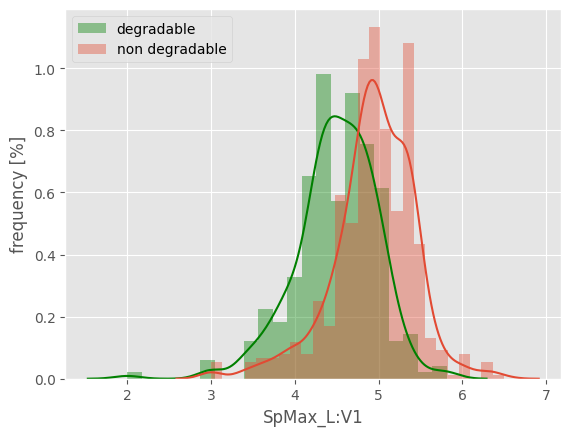

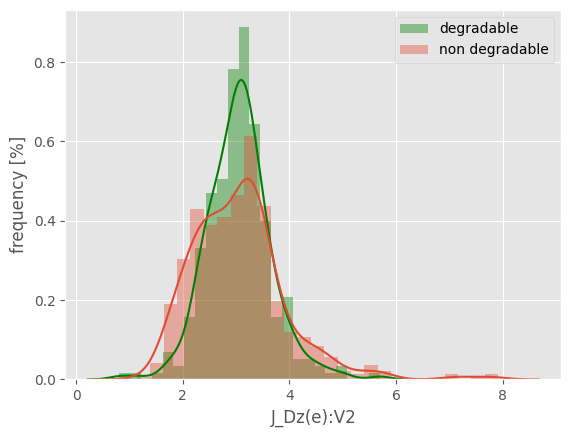

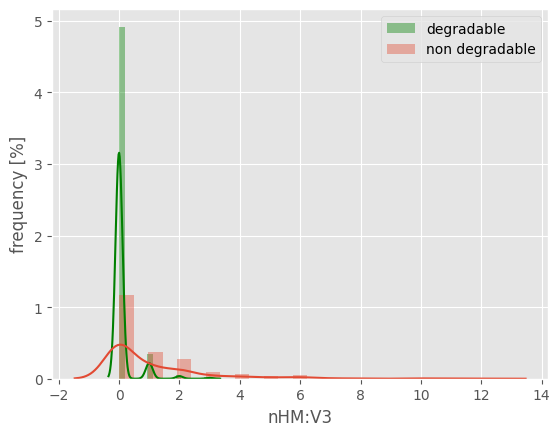

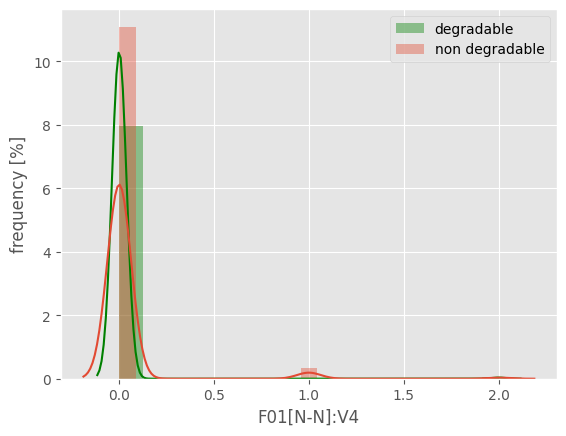

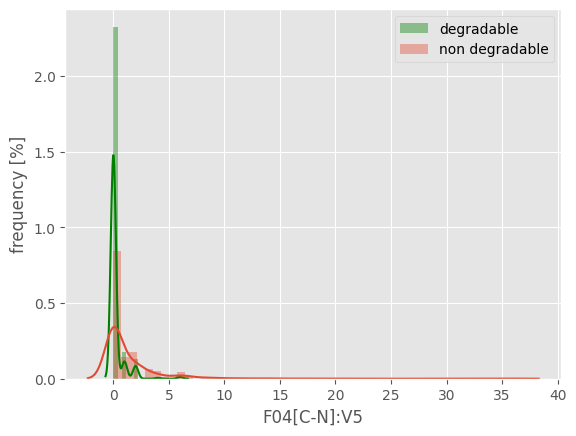

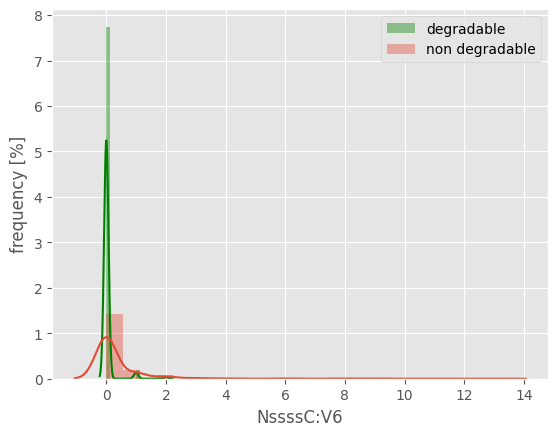

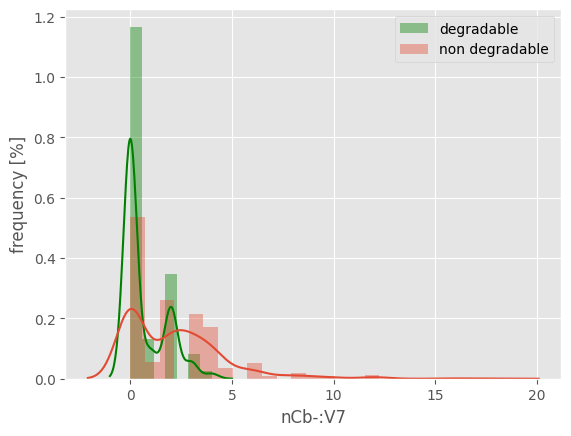

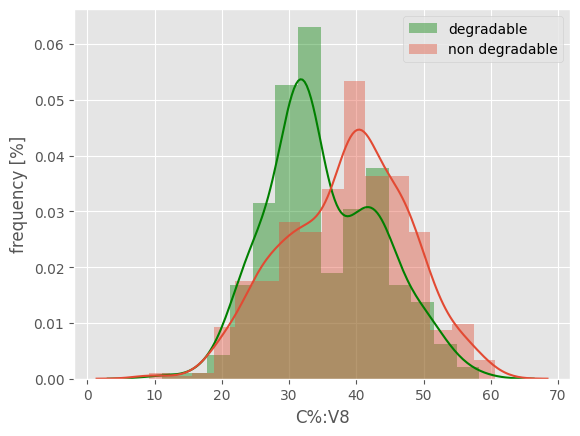

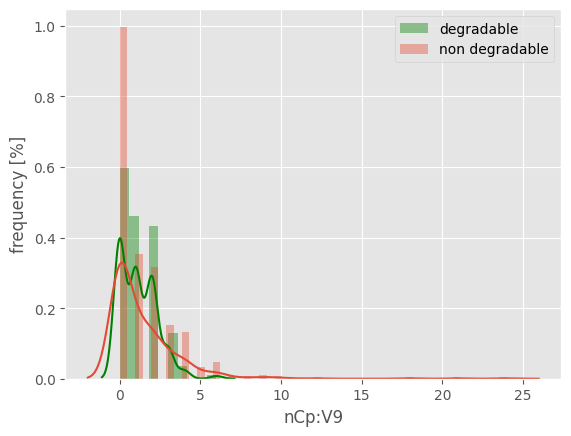

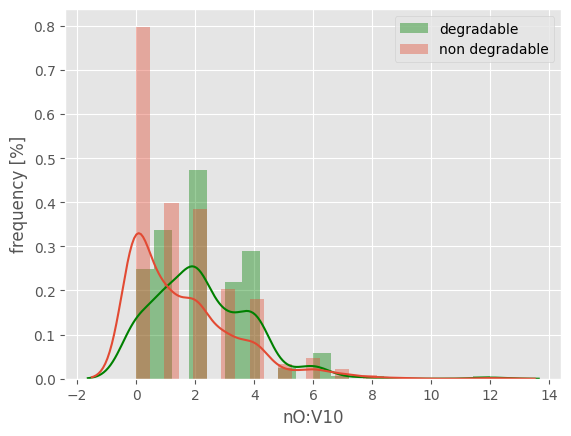

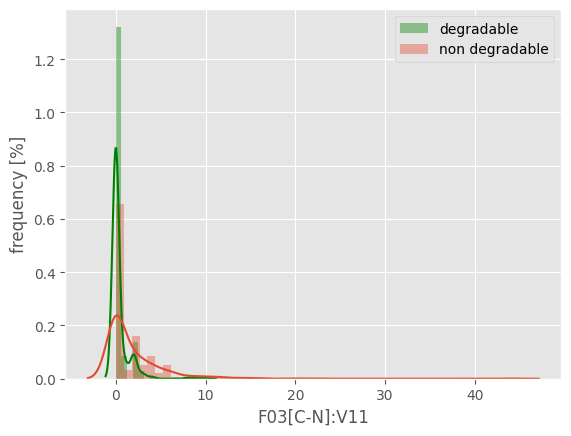

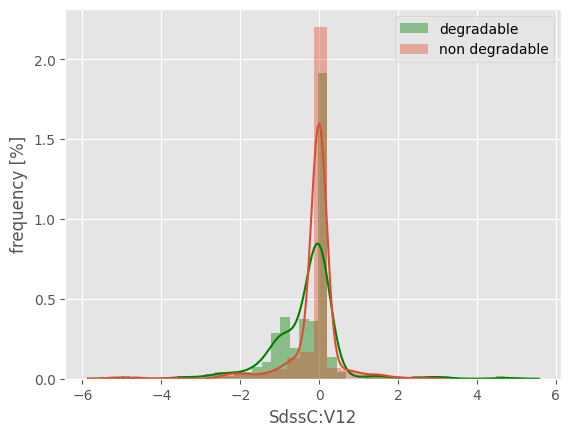

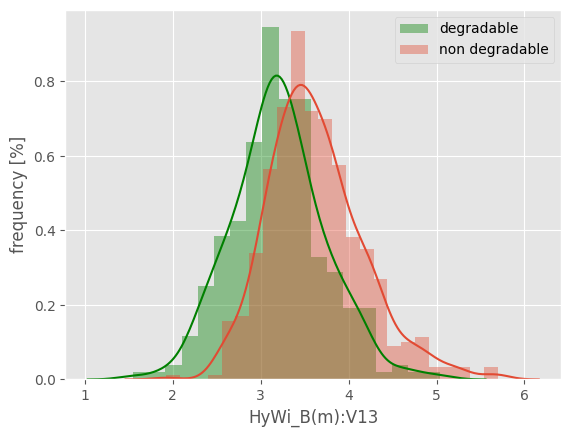

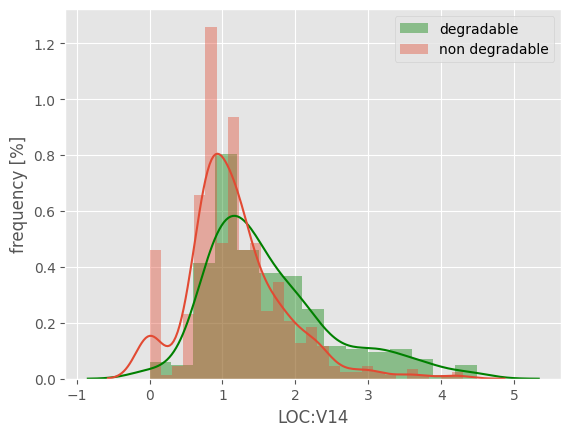

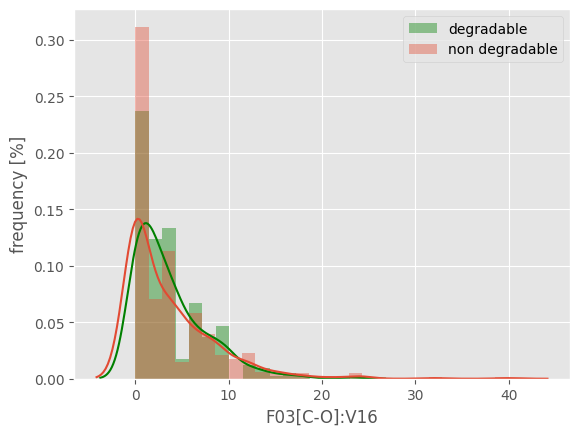

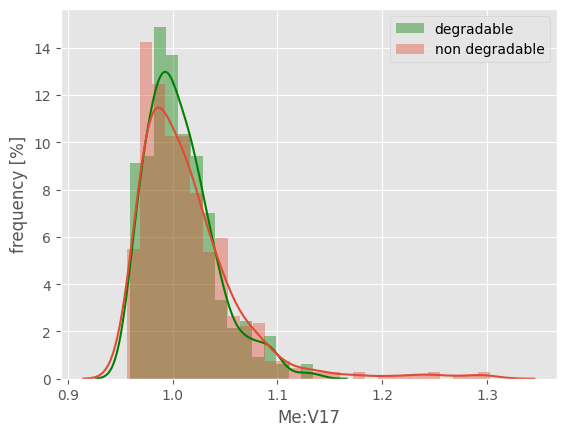

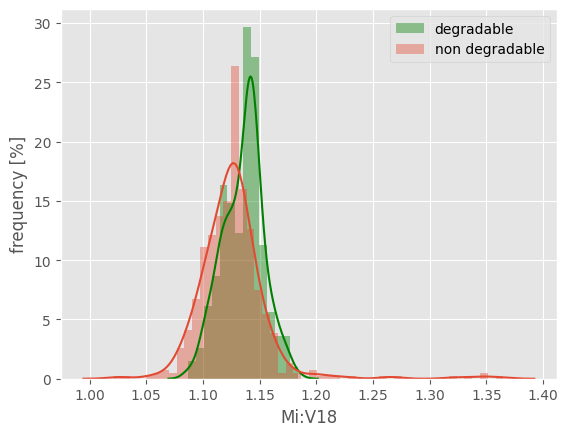

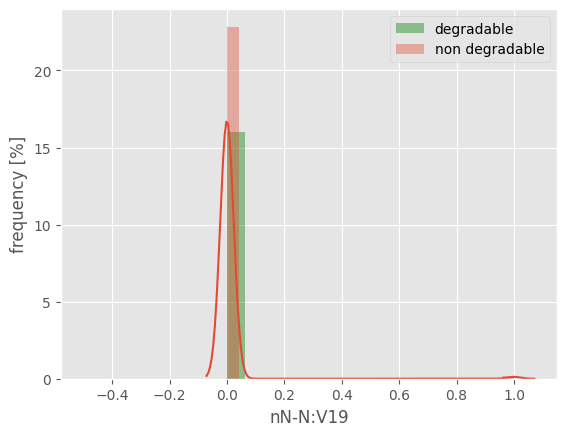

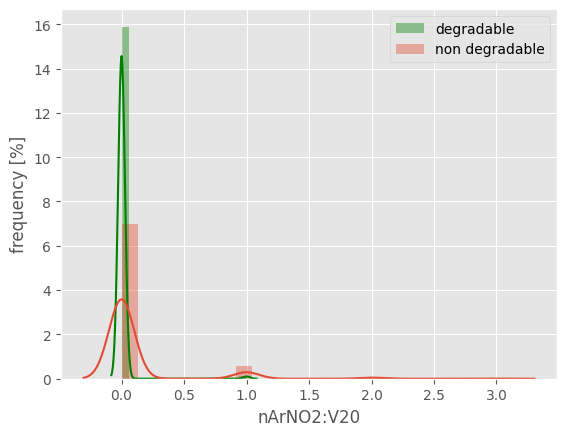

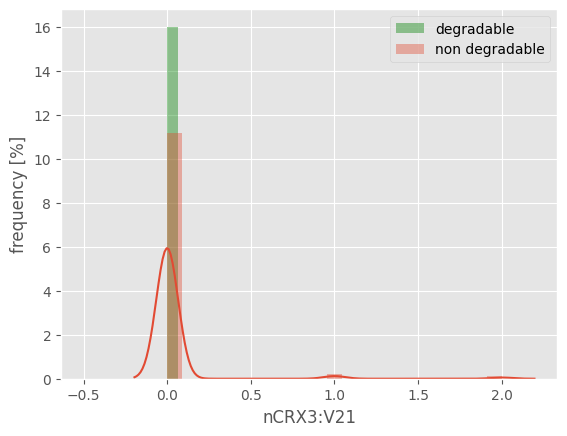

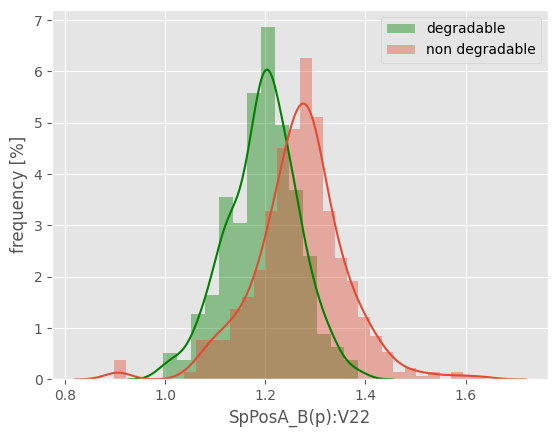

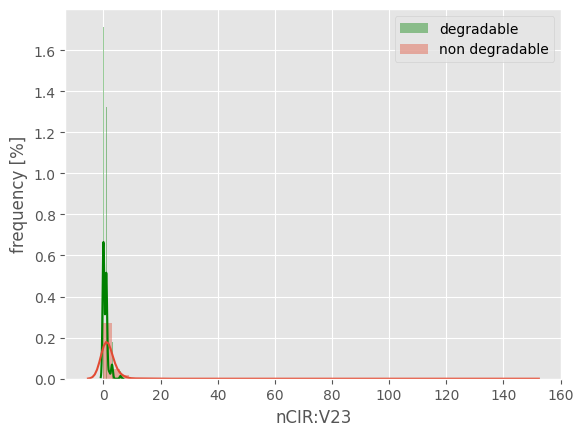

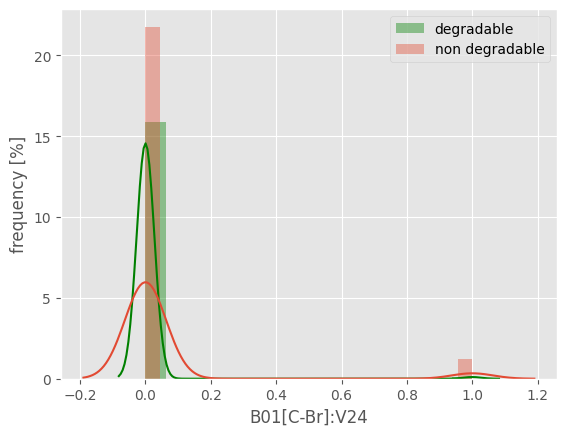

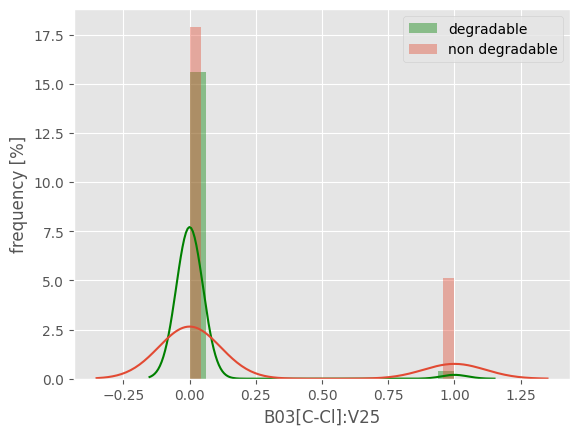

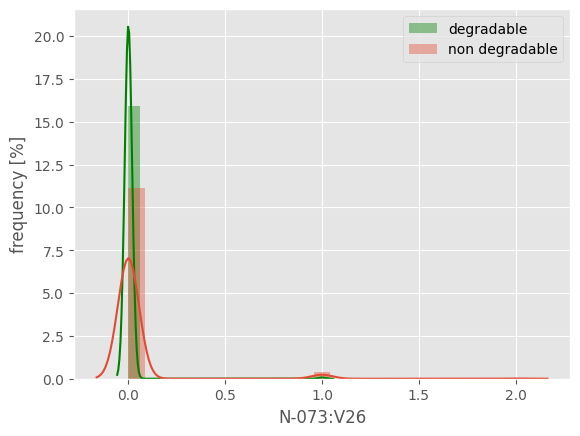

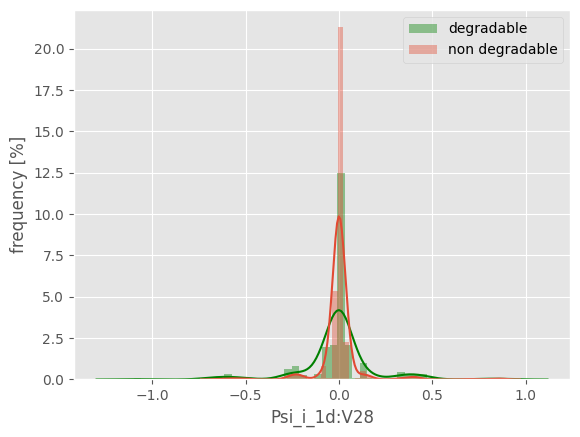

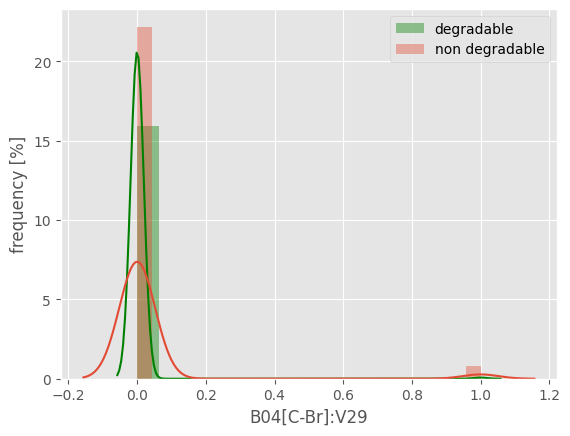

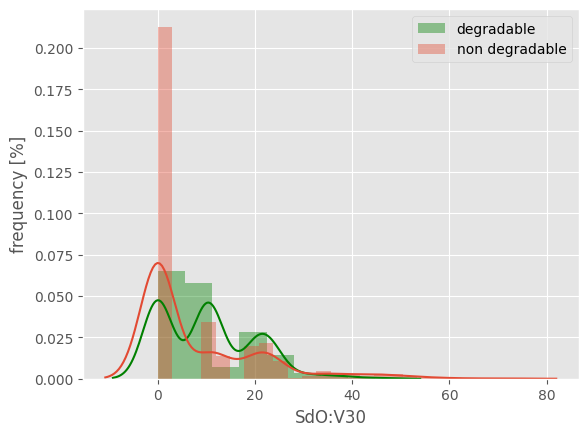

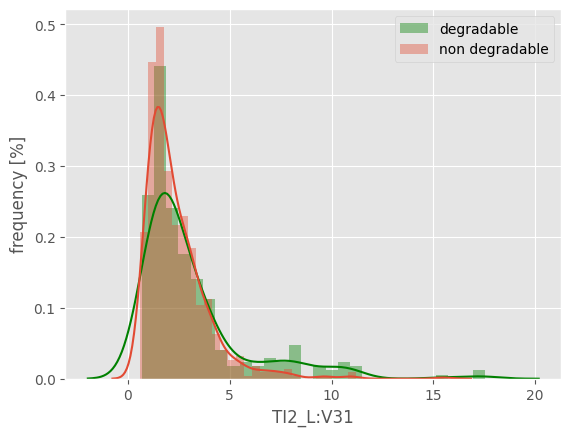

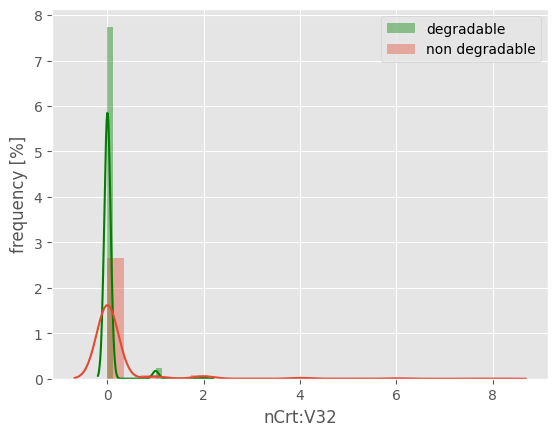

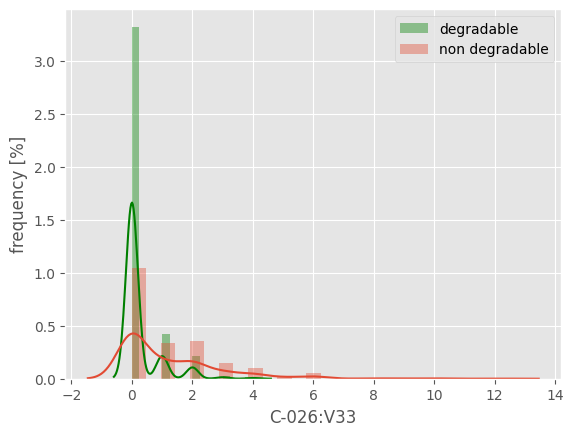

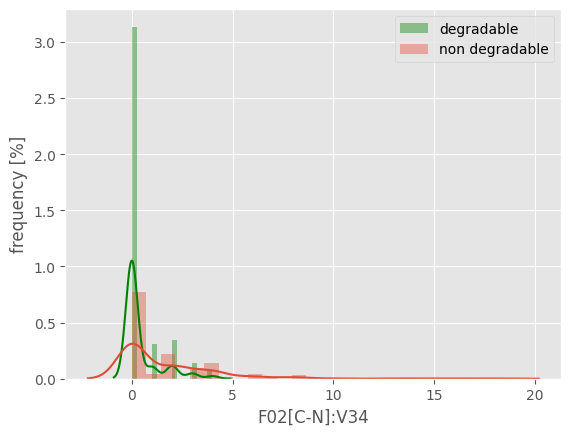

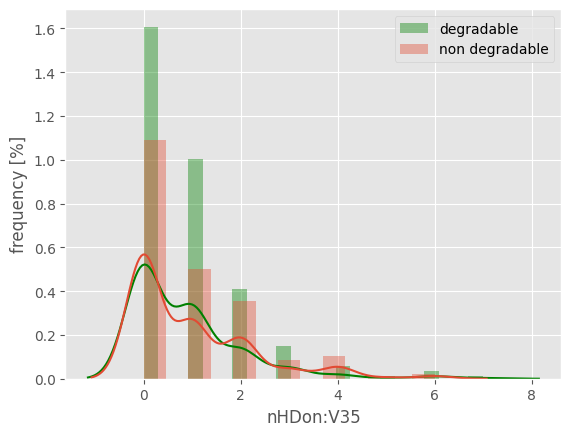

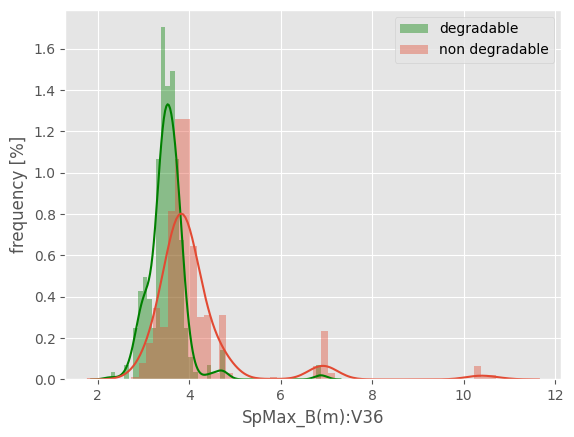

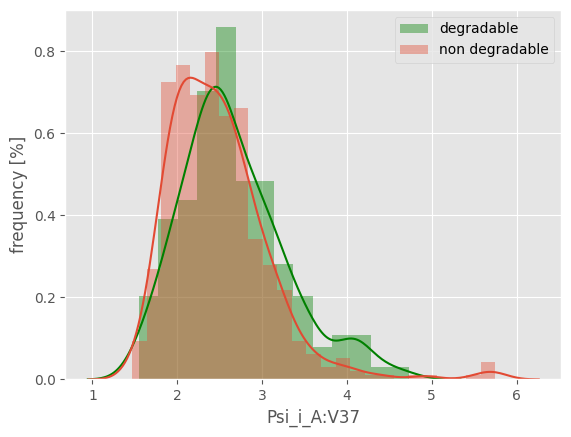

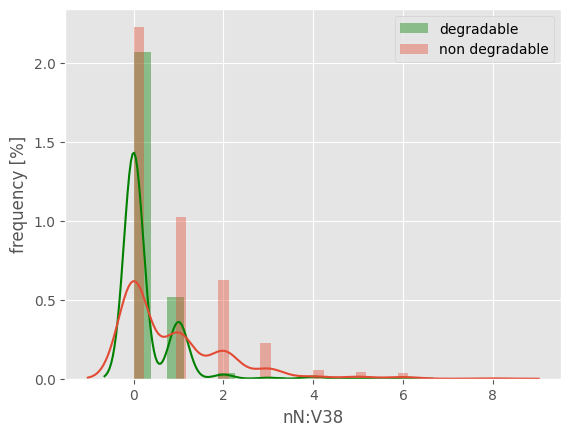

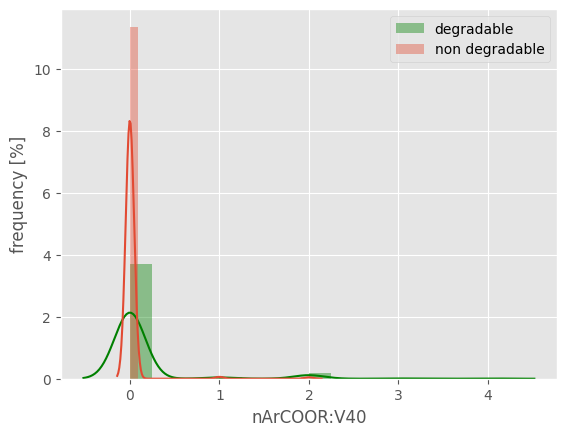

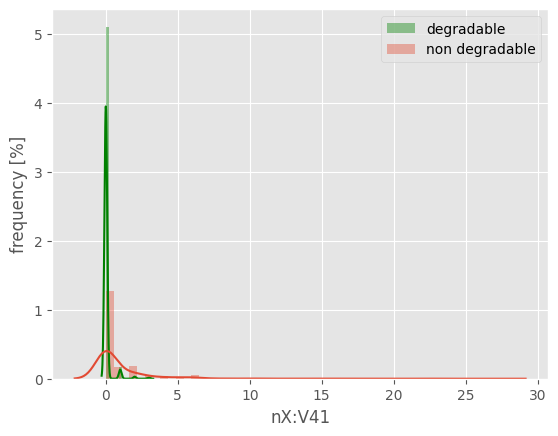

In [ ]:
features = corr_keep #only use the features that are not cocorrelated
import warnings
plt.style.use("ggplot")

warnings.simplefilter('ignore') #ignore warning to imporve readability
#plot the features side by side
for col in list(filter(lambda x: x != "Class", features)):
    sns.distplot(df_train_class1[col] ,label = "degradable", color = "g")
    sns.distplot(df_train_class0[col], label = "non degradable" )
    plt.ylabel("frequency [%]")
    plt.xlabel(names[df_train.columns.get_loc(col)].split(" ")[0]+col)
    plt.legend()
    plt.show()

The following Features lead to a high speration of the target classes.
- SpPosA_B(p) 
- HyWi_B(m)
- C%
- SpMax_B(m)
- SpMax_L

In [ ]:
X = df_train[features]
X = X.drop('Class', axis=1)
Y = df_train['Class']

In [ ]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V40,V41
3,3.932,3.2512,0,0.0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,0,1.009,1.152,0,0,0,1.092,0,0,0,0,-0.008,0.0,0.000,4.891,0,0,0,1,3.076,2.417,0,0,0
5,4.236,3.3944,0,0.0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,2,1.004,1.147,0,0,0,1.137,0,0,0,0,-0.002,0.0,10.348,5.588,0,0,0,0,3.351,2.405,0,0,0
6,4.236,3.4286,0,0.0,0,0,0,28.6,2,4,0,-0.275,3.313,2.522,1,1.014,1.149,0,0,0,1.119,0,0,0,0,-0.008,0.0,10.276,4.746,0,0,0,0,3.351,2.556,0,0,0
7,5.000,5.0476,1,0.0,0,0,0,11.1,0,3,0,0.000,2.872,0.722,0,1.092,1.153,0,0,0,1.125,0,0,0,0,0.446,0.0,18.375,0.800,0,0,0,1,4.712,4.583,0,0,0
8,4.525,3.8301,0,0.0,0,0,0,31.6,3,2,0,-0.039,3.418,2.468,5,0.980,1.142,0,0,0,1.179,0,0,0,0,-0.002,0.0,11.115,3.889,0,0,0,0,3.379,2.143,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,5.029,2.5966,0,0.0,0,0,4,46.7,0,4,0,-0.761,3.837,1.418,10,1.020,1.111,0,0,0,1.254,3,0,0,0,0.000,0.0,22.765,2.586,0,0,0,0,3.919,2.611,0,2,0
1052,5.287,3.3732,0,0.0,9,0,0,35.3,0,9,9,-5.256,4.319,2.346,21,1.043,1.140,0,0,0,1.178,1,0,0,0,0.000,0.0,71.167,3.396,0,0,3,0,3.787,3.083,3,0,0
1053,4.869,1.7670,0,1.0,9,0,5,44.4,0,4,14,-0.391,4.435,1.073,9,1.016,1.123,0,1,0,1.261,3,0,0,0,0.000,0.0,33.540,6.465,0,4,13,0,3.848,2.576,5,1,0
1054,5.158,1.6914,2,0.0,36,0,9,56.1,0,0,44,0.000,4.902,0.257,0,1.007,1.093,0,0,0,1.410,147,0,1,2,0.000,0.0,0.000,1.535,0,1,16,0,5.808,2.055,8,0,1


In [ ]:
Y

3       1
5       1
6       1
7       1
8       1
       ..
1050    0
1052    0
1053    0
1054    0
1055    0
Name: Class, Length: 846, dtype: int64

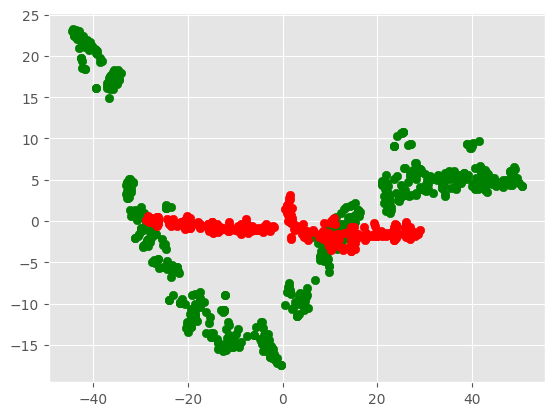

In [ ]:

subsets = [df_train_class0[['V1', 'V8', 'V13', 'V22', 'V36']], df_train_class1[['V1', 'V8', 'V13', 'V22', 'V36']]]

# Loop over the subsets
colors = ['red', 'green']

#

for subset in subsets:
    # Transform the data using t-SNE
    X_tsne = TSNE(n_components=2).fit_transform(subset)

    # Plot the transformed data
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors.pop())



# Show the plot
plt.show()

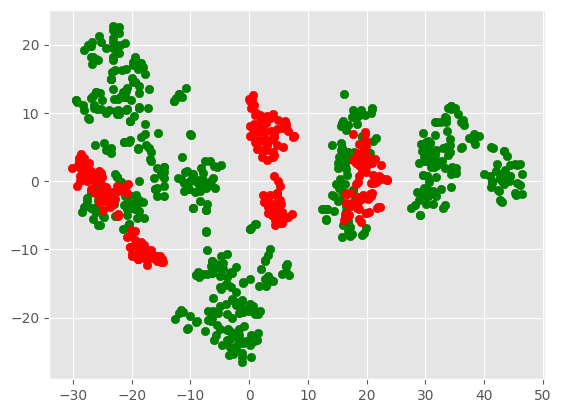

In [ ]:
subsets = [df_train_class0[features], df_train_class1[features]]
# Loop over the subsets
colors = ['red', 'green']

#

for subset in subsets:
    # Transform the data using t-SNE
    X_tsne = TSNE(n_components=2).fit_transform(subset)

    # Plot the transformed data
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors.pop())



# Show the plot
plt.show()


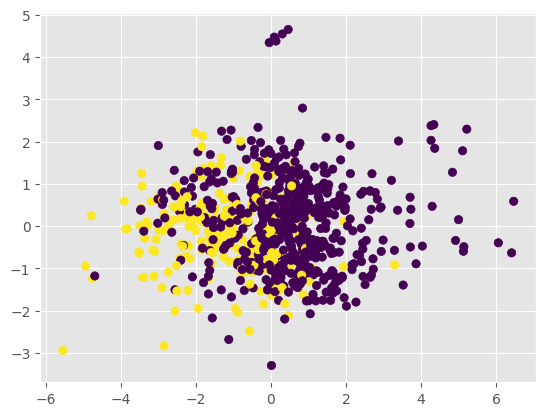

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_pca = PCA(n_components=3).fit_transform(scaler.fit_transform(X[['V1', 'V8', 'V13', 'V22', 'V36']]))

# Plot the transformed data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y)
#plot the vector of the first two principal components



# Show the plot
plt.show()

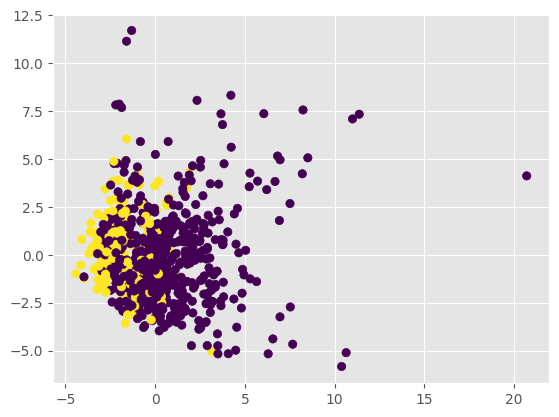

In [ ]:
#standardize the data


X_pca = PCA(n_components=2).fit_transform(scaler.fit_transform(X))



# Plot the transformed data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y)

# Show the plot
plt.show()

In [ ]:
X_all_features = df_train.drop('Class', axis=1)
Y_all_features = df_train['Class']

X_only_best_features = df_train[features] 
Y_only_best_features = df_train['Class']

In [ ]:
X_all_features

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41
3,3.932,3.2512,0,0.0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,9.110,0,1.009,1.152,0,0,0,1.092,0,0,0,0,1.942,-0.008,0.0,0.000,4.891,0,0,0,1,3.076,2.417,0,7.601,0,0
5,4.236,3.3944,0,0.0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,9.528,2,1.004,1.147,0,0,0,1.137,0,0,0,0,1.985,-0.002,0.0,10.348,5.588,0,0,0,0,3.351,2.405,0,8.003,0,0
6,4.236,3.4286,0,0.0,0,0,0,28.6,2,4,0,-0.275,3.313,2.522,9.383,1,1.014,1.149,0,0,0,1.119,0,0,0,0,1.980,-0.008,0.0,10.276,4.746,0,0,0,0,3.351,2.556,0,7.904,0,0
7,5.000,5.0476,1,0.0,0,0,0,11.1,0,3,0,0.000,2.872,0.722,9.657,0,1.092,1.153,0,0,0,1.125,0,0,0,0,2.000,0.446,0.0,18.375,0.800,0,0,0,1,4.712,4.583,0,9.303,0,0
8,4.525,3.8301,0,0.0,0,0,0,31.6,3,2,0,-0.039,3.418,2.468,9.786,5,0.980,1.142,0,0,0,1.179,0,0,0,0,2.119,-0.002,0.0,11.115,3.889,0,0,0,0,3.379,2.143,0,7.950,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,5.029,2.5966,0,0.0,0,0,4,46.7,0,4,0,-0.761,3.837,1.418,10.634,10,1.020,1.111,0,0,0,1.254,3,0,0,0,2.403,0.000,0.0,22.765,2.586,0,0,0,0,3.919,2.611,0,8.958,2,0
1052,5.287,3.3732,0,0.0,9,0,0,35.3,0,9,9,-5.256,4.319,2.346,11.029,21,1.043,1.140,0,0,0,1.178,1,0,0,0,2.462,0.000,0.0,71.167,3.396,0,0,3,0,3.787,3.083,3,9.278,0,0
1053,4.869,1.7670,0,1.0,9,0,5,44.4,0,4,14,-0.391,4.435,1.073,11.072,9,1.016,1.123,0,1,0,1.261,3,0,0,0,2.314,0.000,0.0,33.540,6.465,0,4,13,0,3.848,2.576,5,9.537,1,0
1054,5.158,1.6914,2,0.0,36,0,9,56.1,0,0,44,0.000,4.902,0.257,11.817,0,1.007,1.093,0,0,0,1.410,147,0,1,2,2.622,0.000,0.0,0.000,1.535,0,1,16,0,5.808,2.055,8,11.055,0,1


In [ ]:
Y_all_features

3       1
5       1
6       1
7       1
8       1
       ..
1050    0
1052    0
1053    0
1054    0
1055    0
Name: Class, Length: 846, dtype: int64

In [ ]:
X_only_best_features

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V40,V41,Class
3,3.932,3.2512,0,0.0,0,0,0,26.7,2,4,0,0.000,3.279,2.585,0,1.009,1.152,0,0,0,1.092,0,0,0,0,-0.008,0.0,0.000,4.891,0,0,0,1,3.076,2.417,0,0,0,1
5,4.236,3.3944,0,0.0,0,0,0,29.4,2,4,0,-0.271,3.449,2.753,2,1.004,1.147,0,0,0,1.137,0,0,0,0,-0.002,0.0,10.348,5.588,0,0,0,0,3.351,2.405,0,0,0,1
6,4.236,3.4286,0,0.0,0,0,0,28.6,2,4,0,-0.275,3.313,2.522,1,1.014,1.149,0,0,0,1.119,0,0,0,0,-0.008,0.0,10.276,4.746,0,0,0,0,3.351,2.556,0,0,0,1
7,5.000,5.0476,1,0.0,0,0,0,11.1,0,3,0,0.000,2.872,0.722,0,1.092,1.153,0,0,0,1.125,0,0,0,0,0.446,0.0,18.375,0.800,0,0,0,1,4.712,4.583,0,0,0,1
8,4.525,3.8301,0,0.0,0,0,0,31.6,3,2,0,-0.039,3.418,2.468,5,0.980,1.142,0,0,0,1.179,0,0,0,0,-0.002,0.0,11.115,3.889,0,0,0,0,3.379,2.143,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,5.029,2.5966,0,0.0,0,0,4,46.7,0,4,0,-0.761,3.837,1.418,10,1.020,1.111,0,0,0,1.254,3,0,0,0,0.000,0.0,22.765,2.586,0,0,0,0,3.919,2.611,0,2,0,0
1052,5.287,3.3732,0,0.0,9,0,0,35.3,0,9,9,-5.256,4.319,2.346,21,1.043,1.140,0,0,0,1.178,1,0,0,0,0.000,0.0,71.167,3.396,0,0,3,0,3.787,3.083,3,0,0,0
1053,4.869,1.7670,0,1.0,9,0,5,44.4,0,4,14,-0.391,4.435,1.073,9,1.016,1.123,0,1,0,1.261,3,0,0,0,0.000,0.0,33.540,6.465,0,4,13,0,3.848,2.576,5,1,0,0
1054,5.158,1.6914,2,0.0,36,0,9,56.1,0,0,44,0.000,4.902,0.257,0,1.007,1.093,0,0,0,1.410,147,0,1,2,0.000,0.0,0.000,1.535,0,1,16,0,5.808,2.055,8,0,1,0


In [ ]:
Y_only_best_features

3       1
5       1
6       1
7       1
8       1
       ..
1050    0
1052    0
1053    0
1054    0
1055    0
Name: Class, Length: 846, dtype: int64

In [ ]:
X_limited_features = df_train[['V1', 'V8', 'V13', 'V22', 'V36']]
Y_limited_features = df_train['Class']


In [ ]:
X_limited_features

,V1,V8,V13,V22,V36
3,3.932,26.7,3.279,1.092,3.076
5,4.236,29.4,3.449,1.137,3.351
6,4.236,28.6,3.313,1.119,3.351
7,5.000,11.1,2.872,1.125,4.712
8,4.525,31.6,3.418,1.179,3.379
...,...,...,...,...,...
1050,5.029,46.7,3.837,1.254,3.919
1052,5.287,35.3,4.319,1.178,3.787
1053,4.869,44.4,4.435,1.261,3.848
1054,5.158,56.1,4.902,1.410,5.808


# 2.2 Modeling

In [ ]:
#majority class classifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# Create a dummy classifier
dummy = DummyClassifier(strategy='most_frequent')

# Fit the dummy classifier
dummy.fit(X_all_features, Y_all_features)

# Predict the labels of the test set: y_pred
y_pred = dummy.predict(X_all_features)

# Compute the accuracy of the dummy classifier
accuracy = accuracy_score(Y_all_features, y_pred)
print("Accuracy score: {:.2f}".format(accuracy))


Accuracy score: 0.67


In [ ]:
#random classifier

# Create a dummy classifier
dummy = DummyClassifier(strategy='uniform')

# Fit the dummy classifier
dummy.fit(X_all_features, Y_all_features)

# Predict the labels of the test set: y_pred
y_pred = dummy.predict(X_all_features)

# Compute the accuracy of the dummy classifier
accuracy = accuracy_score(Y_all_features, y_pred)

print("Accuracy score: {:.2f}".format(accuracy))

Accuracy score: 0.51


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

X_limited_train, X_limited_test, Y_limited_train, Y_limited_test = train_test_split(X_limited_features, Y_limited_features, test_size = 0.3, random_state = 100)

X_only_best_train, X_only_best_test, Y_only_best_train, Y_only_best_test = train_test_split(X_only_best_features, Y_only_best_features, test_size = 0.3, random_state = 100)

X_all_train, X_all_test, Y_all_train, Y_all_test = train_test_split(X_all_features, Y_all_features, test_size = 0.3, random_state = 100)

# Best k for knn on all features

knn_results = []
max_knn =[]
max_knn.append(0)
for i in range(251):
    classifier = KNeighborsClassifier(n_neighbors = i+1)
    classifier.fit(X_all_train,Y_all_train)
    knn_score = classifier.score(X_all_test,Y_all_test)
    knn_results.append(knn_score)
    if(knn_score>max_knn[0]):
        if(len(max_knn) < 2):
            max_knn.append(i)
            max_knn[0] = knn_score
        else:
            max_knn[1] = i
            max_knn[0] = knn_score
        
    
print("Knn best k: " + str(max_knn[0]) + ' ' + str(max_knn[1]))

x_axis = range(len(knn_results))

plt.plot(x_axis,knn_results)
plt.show()

# Best Adaboost parameters for all features

boost_results = []
max_boost= []
max_boost.append(0)
for i in range(251):
    adaboost = AdaBoostClassifier(n_estimators = i+1, learning_rate = 0.2).fit(X_all_train, Y_all_train)
    score = adaboost.score(X_all_test, Y_all_test)
    boost_results.append(score)
    if(score>max_boost[0]):
        if(len(max_boost) < 2):
            max_boost.append(i)
            max_boost[0] = score
        else:
            max_boost[1] = i
            max_boost[0] = score
        
print("Adaboost best num of estimators: " +str(max_boost[0]) + ' ' + str(max_boost[1]))

plt.plot(x_axis,boost_results)
plt.show()


